# Compare parameters
In this notebook we compare the various models (DFN, SPMe and SPM) for two parameter sets. This notebook follows very similarly to ["Compare models"](./compare_models.ipynb), which you can check for more details.


If this notebook is running on Google Colab, we first need to install PyBaMM (you can skip if not using Google Colab).

In [1]:
%pip install pybamm -q

You should consider upgrading via the '/home/ferranbrosa/continuum-model-review/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We start by importing PyBaMM and defining the models we want to solve.

In [2]:
import pybamm

In [3]:
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.DFN(),
]

## Chen 2020

Here are the simulations for the parameters in [Chen et al (2020)](https://iopscience.iop.org/article/10.1149/1945-7111/ab9050) (LG M50) parameter set. This parameter set can be pushed to about 2.1C without getting electrolyte depletion. We first define the parameter values

In [4]:
param = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)

and then run the simulations

In [5]:
sims = []
C_rate = 2.1
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)

We can now plot the results

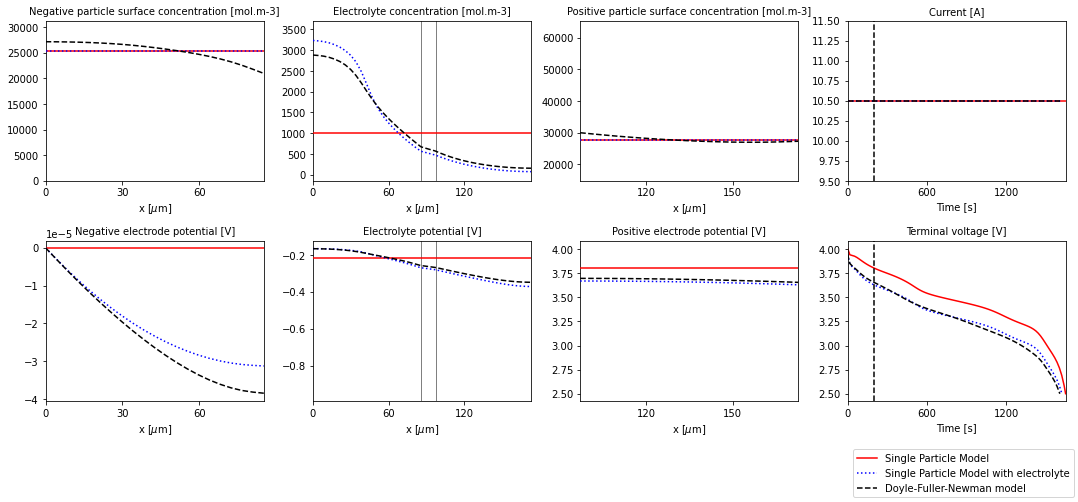

In [6]:
plot = pybamm.QuickPlot(sims, time_unit="seconds")
plot.plot(200)
# plot.fig.savefig("img/comparison_Chen2020.png", dpi=300)

## Ecker 2015

Here are the simulations for the [Ecker et al (2015)](https://iopscience.iop.org/article/10.1149/2.0551509jes) parameter set. This one can be pushed to about 11C without getting electrolyte depletion. We first define the parameter values

In [7]:
param = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Ecker2015)

and then run the simulations

In [8]:
sims = []
C_rate = 11
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)

We can finally plot the results

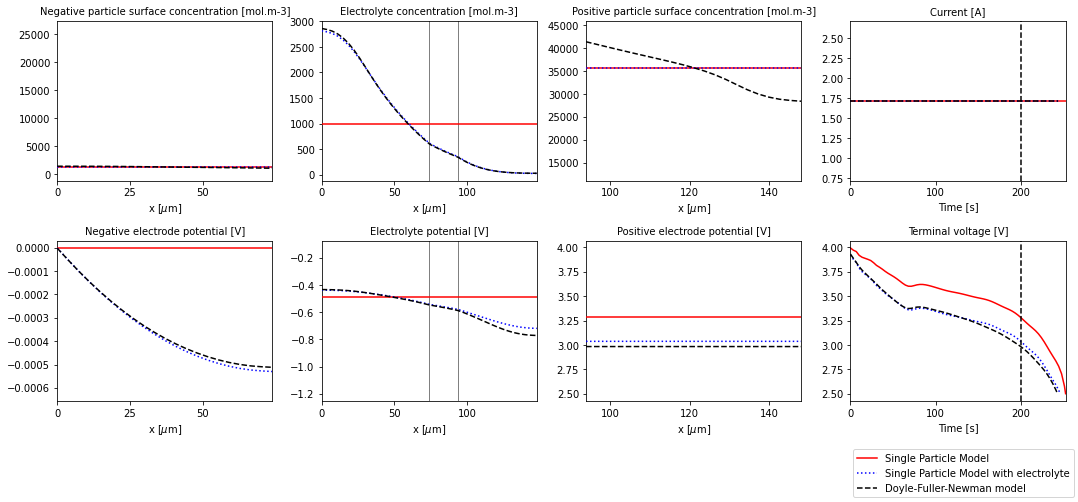

In [9]:
plot = pybamm.QuickPlot(sims, time_unit="seconds")
plot.plot(200)
# plot.fig.savefig("img/comparison_Ecker2015.png", dpi=300)

The articles that contributed to this notebook are

In [10]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Society, 167(8):080534, 2020. doi:10.1149/1945-7111/ab9050.
[3] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[4] Madeleine Ecker, Stefan Käbitz, Izaro Laresgoiti, and Dirk Uwe Sauer. Parameterization of a Physico-Chemical Model of a Lithium-Ion Battery: II. Model Validation. Journal of The Electrochemical Society, 162(9